In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load datasets
customers = pd.read_csv("/content/Customers.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [21]:
# Merge customer and transaction data
customer_transactions = pd.merge(customers, transactions, on='CustomerID')

In [22]:
# Create customer profiles
customer_profile = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count',  # Number of transactions
}).reset_index()

In [23]:
# Add tenure feature (months since signup)
customer_profile['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customer_profile['Tenure'] = (pd.Timestamp.now() - customer_profile['SignupDate']).dt.days // 30

In [24]:
# Normalize features for clustering
scaler = StandardScaler()
customer_profile_scaled = scaler.fit_transform(customer_profile[['TotalValue', 'TransactionID', 'Tenure']])

In [25]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(customer_profile_scaled)

In [26]:
# Evaluate clustering using DB Index
db_index = davies_bouldin_score(customer_profile_scaled, customer_profile['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9220617900579914


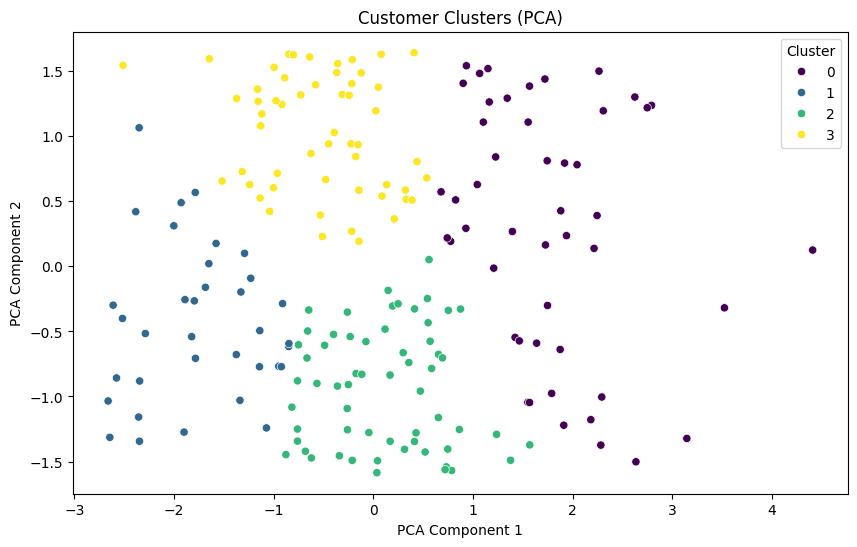

In [29]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
customer_profile_pca = pca.fit_transform(customer_profile_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_profile_pca[:, 0], y=customer_profile_pca[:, 1], hue=customer_profile['Cluster'], palette='viridis')
plt.title("Customer Clusters (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("customer_clusters.png")  # Save plot
plt.show()

In [30]:
# Save clustering results
customer_profile.to_csv('Customer_Clusters.csv', index=False)
print("Customer clustering results saved to 'Customer_Clusters.csv'.")

Customer clustering results saved to 'Customer_Clusters.csv'.
